In [26]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.stats.api as sms
import pylab as py
import scipy.linalg as la

import scipy.stats as stats
import scipy

from scipy.stats import laplace
from scipy.stats import logistic
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import multivariate_normal as mnorm
from scipy.stats import t as studt
from scipy.stats import f as fdist
from scipy.stats import gaussian_kde as gkde
from sklearn.neighbors import KernelDensity
import math

import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Exercise 4.1.1

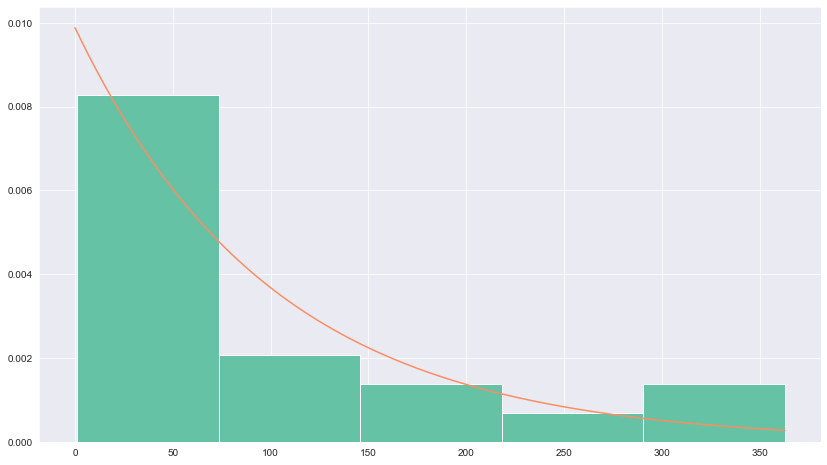

In [27]:
lt = [1,4,5,21,22,28,40,42,51,53,58,67,95,124,124,160,202,260,303,363]
a=1
b=np.mean(lt)

x = [i for i in range(364)]
est = gamma.pdf(x, a, loc=0, scale=b)

plt.figure(figsize = (14,8))
plt.hist(lt,bins = 5,density = True)
plt.plot(x,est)
plt.show()

In [28]:
# (c)
np.median(lt)

55.5

In [29]:
# (d)
gamma.median(a, loc=0, scale=b)

70.11183731363849

#### Exercise 4.1.2

In [30]:
weights = [160,175,180,185,185,185,190,190,195,195,195,200,200,200,200,205,205,210,210,218,219,220,222,225,225,232]

In [31]:
mu = np.mean(weights)
sig = np.std(weights)

# Don't use the line below because it is asking for mle estimator, and not unbiased estimator.
# sig = np.sqrt(sig*sig*26/25)

x = [i for i in range(233)]
est = norm.pdf(x, loc=mu, scale=sig)

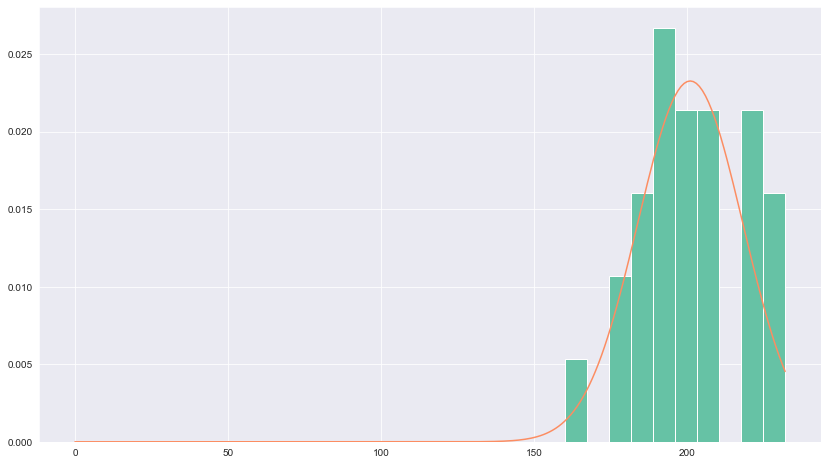

In [32]:
plt.figure(figsize = (14,8))
plt.hist(weights,bins = 10,density = True)
plt.plot(x,est)
plt.show()

In [33]:
# (c)
p = np.sum([weights[i]>215 for i in range(26)])/len(weights)
print(p)

0.2692307692307692


In [34]:
# (d)
pnorm = 1-norm.cdf(215, loc=mu, scale=sig)
print(pnorm)

0.20707755079570145


#### Exercise 4.1.3

In [35]:
ncust = [9,7,9,15,10,13,11,7,2,12]
lmda = np.mean(ncust)

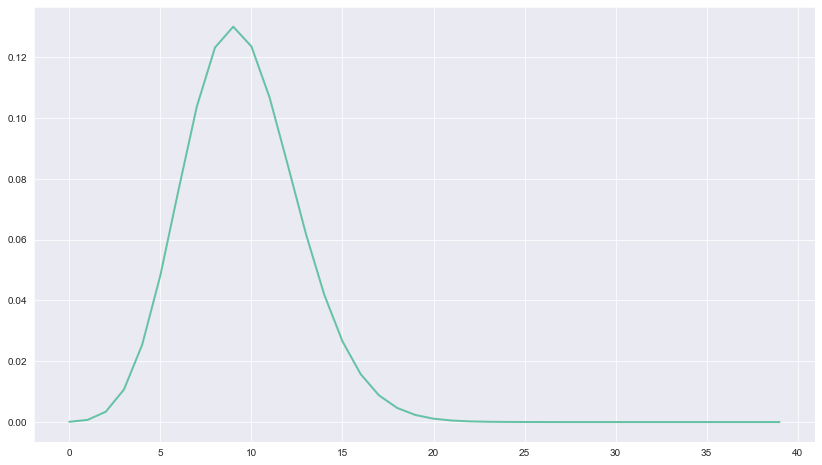

In [36]:
x = [i for i in range(40)]
yp = poisson.pmf(k=x, mu=lmda)

plt.figure(figsize = (14,8))
plt.plot(x,yp,linewidth = 2)
plt.show()

#### Exercise 4.1.8

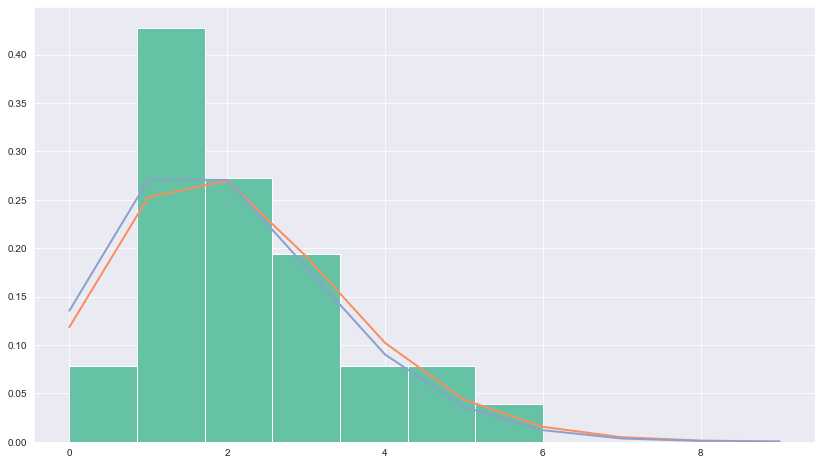

In [37]:
data = [2,2,1,1,1,2,1,2,1,6,5,5,1,2,1,3,3,2,0,4,2,1,1,3,1,1,3,3,4,0]
lmda = np.mean(data)

x = [i for i in range(10)]
yp1 = poisson.pmf(k=x, mu=lmda)
yp2 = poisson.pmf(k=x, mu=2)

plt.figure(figsize = (14,8))
a,b,c = plt.hist(data,bins = 7,density = True)
plt.plot(x,yp1,linewidth = 2)
plt.plot(x,yp2,linewidth = 2)
plt.show()

In [38]:
yp2

array([1.35335283e-01, 2.70670566e-01, 2.70670566e-01, 1.80447044e-01,
       9.02235222e-02, 3.60894089e-02, 1.20298030e-02, 3.43708656e-03,
       8.59271640e-04, 1.90949253e-04])

In [39]:
1-poisson.cdf(k=5, mu=lmda)

0.021870485842241494

#### Exercise 4.1.10

In [40]:
data = pd.read_csv('data/braindata.csv')

In [41]:
mri = data['MRI_Count'].copy()
n = len(mri)
mu = mri.mean()
sig = np.sqrt((n)/(n-1)*mri.std()*mri.std())

density = gkde(mri)
bns = 10
x = np.arange(mri.min(),mri.max(),bns/10)
ymri = density(x)
ynorm = norm.pdf(x, loc=mu, scale=sig)

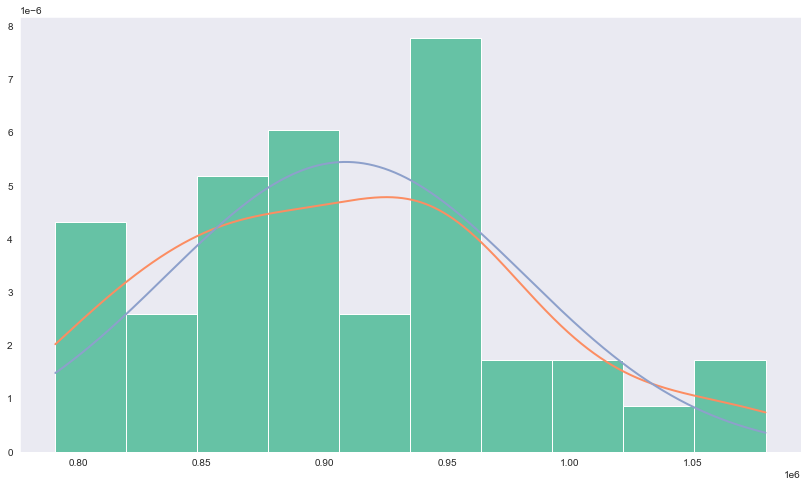

In [42]:
plt.figure(figsize = (14,8))
a,b,c = plt.hist(mri,bins = bns,density = True)
plt.plot(x,ymri,linewidth = 2)
plt.plot(x,ynorm,linewidth = 2)
plt.grid()
plt.show()

In [43]:
low = mu-sig
high = mu+sig
one_sig = mri.loc[np.where((mri>low) & (mri < high))]
len(one_sig)/len(mri)

0.65

In [44]:
low = mu-2*sig
high = mu+2*sig
two_sig = mri.loc[np.where((mri>low) & (mri < high))]
len(two_sig)/len(mri)

0.95

#### Exercise 4.1.11

In [45]:
data = pd.read_csv('data/speedlight.csv')
speed = data['speed']
bns = 10

n = len(speed)
mu = speed.mean()
sig = np.sqrt((n)/(n-1)*speed.std()*speed.std())

In [46]:
density = gkde(speed)
x = np.arange(speed.min(),speed.max(),bns/10)
yspeed = density(x)
ynorm = norm.pdf(x, loc=mu, scale=sig)

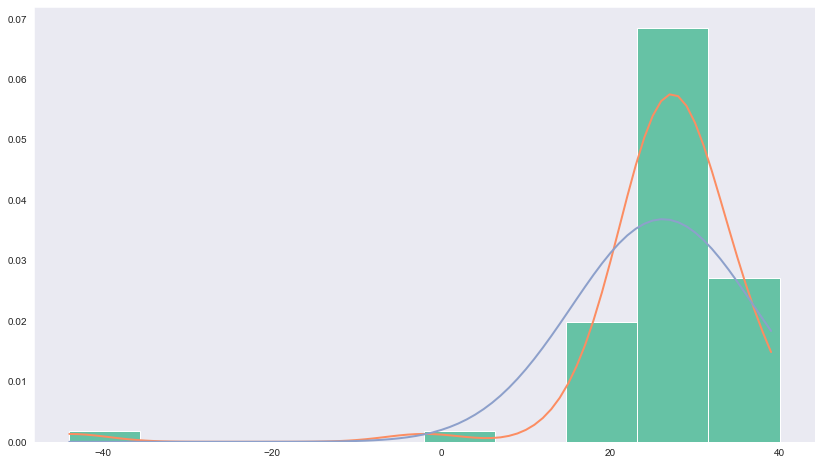

In [47]:
plt.figure(figsize = (14,8))
a,b,c = plt.hist(speed,bins = bns,density = True)
plt.plot(x,yspeed,linewidth = 2)
plt.plot(x,ynorm,linewidth = 2)
plt.grid()
plt.show()

In [48]:
low = mu-sig
high = mu+sig
one_sig = speed.loc[np.where((speed>low) & (speed < high))]
len(one_sig)/len(speed)

0.9393939393939394

In [49]:
low = mu-2*sig
high = mu+2*sig
two_sig = speed.loc[np.where((speed>low) & (speed < high))]
len(two_sig)/len(speed)

0.9696969696969697

#### Exercise 4.2.1

In [50]:
def dxt(a,df,t):
    return (studt.cdf(a, df, loc=0, scale=1)-t)
def invert_studt(t,df):
    a = 10.0 * int(np.sqrt(df/(df-2)))
    b = -10.0 * int(np.sqrt(df/(df-2)))
    c = (a+b)/2
    tol = 0.00001

    while(abs(dxt(c,df,t)) > tol):
        c = (a+b)/2
        if(dxt(c,df,t) > 0):
            a = c
        else:
            b = c
    return c

In [51]:
# invert_studt(0.995,23) # Matches the value in text so the function above must be accurate.

In [52]:
n=20
t10 = invert_studt(0.95,n-1) 
t5 = invert_studt(0.975,n-1)
t1 = invert_studt(0.995,n-1)

In [53]:
xb = 81.2
s = np.sqrt(26.5)
for t in [t1,t5,t10]:
    print((xb-t*s/np.sqrt(n),xb+t*s/np.sqrt(n)))

(77.90636398541616, 84.49363601458384)
(78.79089635366724, 83.60910364633277)
(79.20962652958276, 83.19037347041724)


#### Exercise 4.2.2

In [54]:
def dx(a,t):
    return (norm.cdf(a, loc=0, scale=1)-t)
def invert_norm(t):
    a = 10.0
    b = -10.0
    c = (a+b)/2
    tol = 0.00001

    while(abs(dx(c,t)) > tol):
        c = (a+b)/2
        if(dx(c,t) > 0):
            a = c
        else:
            b = c
    return c

In [55]:
lt = pd.read_csv('data/lifetimemotor.csv')
lt.drop(['Unnamed: 0'],axis = 1,inplace = True)
n=len(lt)

In [56]:
print(lt.head())

xb = np.mean(lt['lifetime'])
s = lt['lifetime'].std()
tn = invert_studt(0.975,n-1)

# Christ!! I spent one hour figuring out the issue. I was using the lines below, and I was supposed to use the lines
# above, to match the answers given at the end of the book.
# Note: np.std(lt['lifetime']) returns std corresponding to the mle of the variance, while lt['lifetime'].std() 
# returns the standard deviation corresponding to sample variance.

# s = np.std(lt['lifetime'])
# tn = invert_norm(0.975)

print((xb-tn*s/np.sqrt(n),xb+tn*s/np.sqrt(n)))

   lifetime
0         1
1         4
2         5
3        21
4        22
(51.82004536074137, 150.47995463925864)


Sample variance = $\frac{ \Sigma_{i=1}^n (X_i - \overline{X})}{n-1} $

MLE of variance = $\frac{ \Sigma_{i=1}^n (X_i - \overline{X})}{n} $

#### Exercise 4.2.3

Basically, $X = \sum\limits_{i=1}^{n} X_i$ where each of $X_i$ is a $\Gamma(1,\theta)$ distribution, results in $X$ having a $\Gamma(n,\theta)$ distribution. Note that the mean of $X$ is $\theta$ which is it's $\beta$. Basically, the mean of a $\Gamma(1,\beta)$ distribution is $\beta$ and hence, scaling it by $\gamma/\beta$ will result in a $\Gamma(1,\gamma)$ distribution.

Scaling $X$ to $2X/\theta$ will result in a $\Gamma(n,2)$ distribution which is a $\chi^2$ distribution with $2n$ degrees of freedom.

The following stackechange answer to a question gives the theoretical basis for the approach taken in the codes below, to find the confidence interval for $\theta$
https://stats.stackexchange.com/a/89231/183497

In [57]:
def dxg(x,a,b,t):
    return (gamma.cdf(x, a, loc=0, scale=b)-t)
def invert_gamma(t,a,b):
    u = 10*a*b
    l = 0
    m = (u+l)/2
    tol = 0.00001

    while(abs(dxg(m,a,b,t)) > tol):
        m = (u+l)/2
        if(dxg(m,a,b,t) > 0):
            u = m
        else:
            l = m
    return m

In [58]:
# a = 20
# b = 2
# t = 0.95
# s = invert_gamma(t,a,b)
# print(s)
# print(gamma.cdf(s, a, loc=0, scale=b))

In [59]:
lt = pd.read_csv('data/lifetimemotor.csv')
lt.drop(['Unnamed: 0'],axis = 1,inplace = True)
n=len(lt)

In [60]:
a = n
b = 2

xs = np.sum(lt['lifetime'])
tx = invert_gamma(0.975,a,b)
ty = invert_gamma(0.025,a,b)

z = (2*xs/tx,2*xs/ty)
print(z)

(68.1817063512471, 165.59996002997752)


#### Exercise 4.2.4

In [61]:
data = pd.read_csv('data/bb.csv')
wt = pd.DataFrame(data[['weight','hitpitind']].copy())
wt.head()

,weight,hitpitind
0,218,0
1,185,1
2,219,0
3,185,1
4,160,1


In [62]:
pitch = wt[['weight']].loc[wt['hitpitind'] == 0].copy()
hit = wt[['weight']].loc[wt['hitpitind'] == 1].copy()

In [63]:
pitch.reset_index(drop=True, inplace=True)
hit.reset_index(drop=True, inplace=True)
print(pitch.head(2))
print(hit.head(2))

   weight
0     218
1     219
   weight
0     185
1     185


In [64]:
xp = pitch['weight'].mean()
xh = hit['weight'].mean()
dw = xp-xh

npt = len(pitch)
nh = len(hit)
n = npt+nh

sp_var = pitch['weight'].var()
sh_var = hit['weight'].var()

s_var = ((npt-1)*sp_var+(nh-1)*sh_var)/(n-2)
s = np.sqrt(s_var)
t = invert_studt(0.975,n-2)

dev = t*s*np.sqrt(1/nh+1/npt)

In [65]:
print((dw-dev,dw+dev))

(6.4584029262172695, 24.69311222529786)


#### Exercise 4.2.5

In [66]:
bb_left = 15
p=bb_left/n
z = invert_norm(0.975)
dev = z*np.sqrt(p*(1-p)/n)

In [67]:
print((p-dev,p+dev))
print(11.0/100.0)
print('Hence it is odd that the number of left handed baseball players is',bb_left,'out of',n,'players.')

(0.14313722222743908, 0.36533735404374734)
0.11
Hence it is odd that the number of left handed baseball players is 15 out of 59 players.


#### Exercise 4.2.6

If you use normal distribution to invert the CDF, you get the answer to be 24 or 25, matching the answer.
This is perhaps correct because it is given that the samples are N($\mu$,9)

In [68]:
s=3
result = {}
t = invert_norm(0.95)
for n in range(22,30):
    result[n] = (t*s/np.sqrt(n))
print(result)

{22: 1.0520799510101992, 23: 1.0289544907540586, 24: 1.007289864624125, 25: 0.9869384765625, 26: 0.9677727982130236, 27: 0.9496819918615975, 28: 0.9325692029661872, 29: 0.9163493708260891}


If you use student-t distribution to invert the CDF, you get the answer to be 26 or 27, NOT matching the answer. I checked with student-t because the statistic $\frac{(\overline{X} - \mu)}{(S/\sqrt{n})}$ is known to follow student-t. Since the varince is given as known, the denomenator is not really needed to be a sample variance and hence, the statistic is $\frac{(\overline{X} - \mu)}{\sigma}$ which is distributed as $N(0,1)$

In [69]:
s=3
result = {}
for n in range(22,30):
    t = invert_studt(0.95,n-1)
    result[n] = (t*s/np.sqrt(n))
print(result)

{22: 1.1005849357645654, 23: 1.0741979442436156, 24: 1.0495250240684761, 25: 1.0264892578125, 26: 1.0049395828568262, 27: 0.9847444624331111, 28: 0.9656157183217607, 29: 0.9476310562123601}


#### Exercise 4.2.7
Here, the sample variance is given and the variance of the normal distribution is not given. Hence we use the usual statistic which has student-t distribution

In [70]:
n=17
t = invert_studt(0.95,n-1)
s = np.sqrt(5.76)
xb = 4.7

dev = t*s/np.sqrt(n)

print((xb-dev,xb+dev))

(3.6837307293704633, 5.716269270629537)


#### Exercise 4.2.8
Here, the actual variance of population is given, which means we can use normal distribution for the statistic

In [71]:
p = (1-0.954)/2
t = invert_norm(1-p)
n = np.ceil((2*t)**2 * 10)
print(n)

160.0


#### Exercise 4.2.9

In [72]:
# (a)
n = 9
tn = invert_norm(0.975)
2*tn/3

1.3065592447916667

The length of the interval is $2 t_n \sigma / \sqrt{n} $ $= 1.306 \sigma$ in this case

In [73]:
# (b)
ts = invert_studt(0.975,n-1)

In [74]:
def gma(x):
    return math.gamma(x)

See https://stats.stackexchange.com/a/27984/183497 for the derivation of E(S).

In [75]:
# Expected value of S, ie E(S), is given below
es = np.sqrt(2/(n-1))*gma(4.5)/gma(4)

# Expected value of the interval is 2ts/sqrt(n)*E(S)
2*ts/np.sqrt(9)*es

1.4900943292314934

#### Exercise 4.2.10

In [76]:
n=8
ts = invert_studt(0.1,n-1)
ts/-1/np.sqrt(n)*np.sqrt(n+1)

1.5007784687674381

#### Exercise 4.2.11

In [77]:
# (a)
n = 10
m = 50
x = np.random.normal(loc=0.0, scale=1.0, size=(m,n))
alpha = 0.9
p = (1+alpha)/2

ts = invert_studt(p,n-1)
low = []
up = []
for i in range(m):
    y = x[i][0:]
    yb = np.mean(y)
    ys = np.sqrt(np.sum((y-yb)*(y-yb))/(n-1))
    dev = ys*ts/np.sqrt(n)
    low.append(yb-dev)
    up.append(yb+dev)

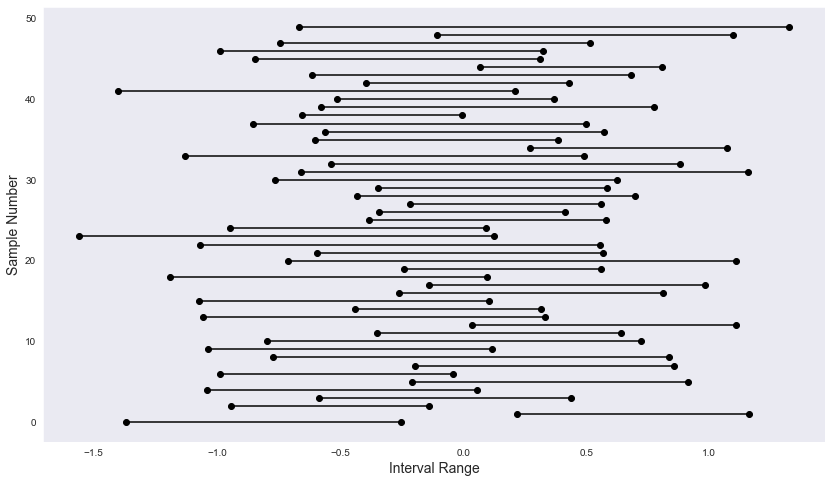

In [78]:
# (b)
plt.figure(figsize = (14,8))
for j in range(m):
    plt.plot((low[j],up[j]),(j,j),'ro-',color='black')
plt.grid()
plt.xlabel('Interval Range',fontsize = 14)
plt.ylabel('Sample Number',fontsize = 14)
plt.show()

#### Exercise 4.2.13
(a)

In [79]:
n = 10
m = 10000
x = np.random.normal(loc=0.0, scale=1.0, size=(m,n))
alpha = 0.95
p = (1+alpha)/2

ts = invert_studt(p,n-1)
low = []
up = []
trap = []
for i in range(m):
    y = x[i][0:]
    yb = np.mean(y)
    ys = np.sqrt(np.sum((y-yb)*(y-yb))/(n-1))
    dev = ys*ts/np.sqrt(n)
    low.append(yb-dev)
    up.append(yb+dev)
    temp = 0
    if(yb < dev):
        if(yb > -1*dev):
            temp = 1
    trap.append(temp)
p1 = np.mean(trap)
print(np.mean(trap))

0.9499


(b)

See https://math.stackexchange.com/a/2193739/145325 for useful information on having samples drawn from Cauchy distribution

In [80]:
n = 10
m = 10000
x = np.random.standard_cauchy(size=(m,n))
alpha = 0.95
p = (1+alpha)/2

ts = invert_studt(p,n-1)
low = []
up = []
trap = []
for i in range(m):
    y = x[i][0:]
    yb = np.mean(y)
    ys = np.sqrt(np.sum((y-yb)*(y-yb))/(n-1))
    dev = ys*ts/np.sqrt(n)
    low.append(yb-dev)
    up.append(yb+dev)
    temp = 0
    if(yb < dev):
        if(yb > -1*dev):
            temp = 1
    trap.append(temp)
p2 = np.mean(trap)
print(np.mean(trap))

0.9796


(c) See https://stats.stackexchange.com/a/74272/183497 for explaination of peculiarities of Cauchy distribution.
Samples from Cauchy distribution do not obey Central Limit Theorem, as the varince of the samples is not finite. For CLT to hold, variance should be finite.

Distribution of sample means of of samples drawn from Cauchy distribution has a Cauchy distribution no matter how many samples you choose. Hence you will never get the sample mean to be Gaussian at any point.

In [81]:
dp = p1-p2

alpha = 0.95
p = (1-alpha)/2
z = invert_norm(1-p)
dev = z*np.sqrt(p1*(1-p1)/m + p2*(1-p2)/m)

print((dp-dev,dp+dev))

# We see that the interval does not trap 0. This is because the samples in (b) were drawn from a Cauchy distribution.

(-0.03479459463261076, -0.02460540536738936)


#### Exercise 4.2.14

In [82]:
alpha = 0.954
p = (1+alpha)/2
z = invert_norm(p)

Basically $z = 2$. The problem statement is not very accurate. They want a cofidence interval for $\beta$ and not for $\mu$ which is not even something that has been defined in this problem.

So essentially, the statistic $\frac{\overline{X} - \mu}{\sigma} = \frac{\overline{X} - 4\beta}{\sqrt{4\beta^2/25}}$ is between $\pm z = \pm 2$. This results in an interval for $\beta$ as $(\frac{5\overline{x}}{24},\frac{5\overline{x}}{16})$ which matches the answer at the end of the book.

#### Exercise 4.2.15

In [83]:
alpha = 0.95
p = (1+alpha)/2
z = invert_norm(p)

$-a< \frac{\overline{X}-\mu}{\sigma/\sqrt{n}} < a$ results in $\overline{X}-\frac{a \sigma}{ \sqrt{n}} < \mu < \overline{X}+\frac{a\sigma}{ \sqrt{n}}$. For $95\%$ confidence, we need $a = z$ where $z$ is as obtained above. Identifying terms, we get $\sqrt{n} = 4z$ or $n = \{4z\}^2$

In [84]:
n = np.floor((4*z)**2)
print(n)

61.0


#### Exercise 4.2.16

In [85]:
alpha = 0.9
p = (1+alpha)/2
z = invert_norm(p)
print(z)

1.6448974609375


Length of the interval = $2z\sqrt{\frac{\hat{p}(1-\hat{p})}{n}} < \frac{z}{\sqrt{n}}$ using the hint given in the text. We need this to be $< 0.02$ and hence, we get $n > \{50z\}^2$

In [86]:
np.ceil(2500*z*z)

6765.0

Matches the answer given in the back of the textbook

#### Exercise 4.2.17

In [87]:
alpha = 0.90
p = (1+alpha)/2
z = invert_norm(p)
print(z)
n = 200
zp = z/np.sqrt(n)
print(zp)

1.6448974609375
0.11631181489854404


The mean and variance of Poisson distribution are identical and equal to $\lambda = \mu$ in our case. So we get the following inequality for our T-statistic -- $-z< \frac{\overline{X}-\mu}{\sqrt{\mu}/\sqrt{n}} < z$. We know all the quantities here except $\mu$ and we get two quadratic inequalities which when solved gives us the interval we are looking for.

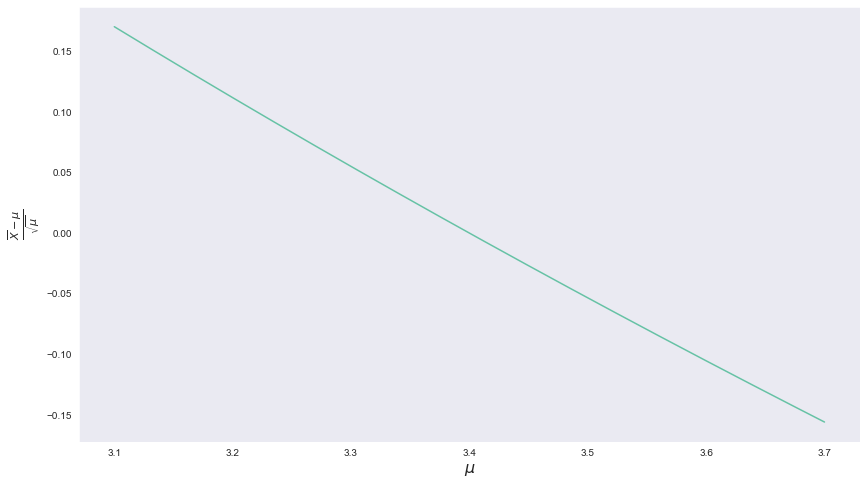

In [88]:
l = np.arange(3.1,3.7,0.001)
xb = 3.4
y = (xb - l)/np.sqrt(l)
plt.figure(figsize = (14,8))
plt.plot(l,y)
plt.xlabel('$\mu$',fontsize = 16)
plt.ylabel('$\\frac{\overline{X} - \mu}{\sqrt{\mu}}$',fontsize = 16)
plt.grid()
plt.show()

In [89]:
p1 = [1,zp,-1*xb]
r = np.roots(p1)
s1 = r**2
s1

array([3.62133925, 3.19218919])

In [90]:
p2 = [1,-1*zp,-1*xb]
r = np.roots(p2)
s2 = r**2
s2

array([3.62133925, 3.19218919])

#### Exercise 4.2.18

In [91]:
# (b)
alpha = 0.95
p = (1+alpha)/2
n = 9
a = (n-1)/2
b = 2
zb = invert_gamma(p,a,b)
za = invert_gamma((1-p),a,b)

In [92]:
s = 7.93
print(((n-1)*s/zb,(n-1)*s/za ))

(3.6180763018657753, 29.10671968636236)


#### Exercise 4.2.20

In [93]:
alpha = 0.95
p = (1+alpha)/2
z = invert_norm(p)

In [94]:
p = 0.6
n = 100
dev = np.sqrt(p*(1-p)/n)
print((p-dev,p+dev))

(0.5510102051443364, 0.6489897948556635)


#### Exercise 4.2.21

In [95]:
# Just apply Equation (4.2.9)

xb = 4.8
yb = 5.6
delta = xb-yb

n1 = 10
n2 = 10
n = n1+n2

s1_2 = 8.64
s2_2 = 7.88

s = np.sqrt(s1_2/n1+s2_2/n1)
z = invert_norm(0.975)

dev = z*s
print((delta-dev,delta+dev))

(-3.318983876998753, 1.7189838769987533)


#### Exercise 4.2.22

In [96]:
p1 = 0.5
p2 = 0.6
n1 = 100
n2 = 100

dp = p1-p2
z = invert_norm(0.95)
dev = z*np.sqrt(p1*(1-p1)/n1+p2*(1-p2)/n2)
print((dp-dev,dp+dev))

(-0.21514282226562498, 0.015142822265625008)


#### Exercise 4.2.26

In [97]:
z = invert_norm(0.95)
np.ceil(50*z*z)

136.0

#### Exercise 4.3.1

In [98]:
data = pd.read_csv('data/bb.csv')

In [99]:
data.head()

,Unnamed: 0,hand,height,weight,hitind,hitpitind,average
0,1,1,74,218,1,0,3.330
1,2,0,75,185,1,1,0.286
2,3,1,77,219,2,0,3.040
3,4,0,73,185,1,1,0.271
4,5,0,69,160,3,1,0.242


The probability mass function for `binom` is:

   $f(k) = \binom{n}{k} p^k (1-p)^{n-k}$

for $k \in {0, 1,..., n}$, $0 \leq p \leq 1$

`binom` takes ``n`` and ``p`` as shape parameters,
where :math:`p` is the probability of a single success 
and :math:`1-p` is the probability of a single failure. 

The probability mass function above is defined in the "standardized" form.
To shift distribution use the ``loc`` parameter.
Specifically, ``binom.pmf(k, n, p, loc)`` is identically
equivalent to ``binom.pmf(k - loc, n, p)``.

In [100]:
def dxb(pm,t,k,n):
    return (binom.cdf(k,n,pm) - t)
def invert_binom(t,k,n):
    pl = 0
    ph = 1
    pm = (ph+pl)/2
    tol = 0.00001
    temp = dxb(pm,t,k,n)
    cnt = 10
    while(abs(temp) > tol):
        if(temp > 0):
            pl = pm
            pm = (pl+ph)/2
        else:
            ph = pm
            pm = (pl+ph)/2
        temp = dxb(pm,t,k,n)
        cnt = cnt - 1
    return pm

In [101]:
pl = invert_binom(0.95,14,59)

In [102]:
ph = invert_binom(0.05,15,59)

In [103]:
print('The confidence interval is ',(np.round(pl,4),np.round(ph,4)))

The confidence interval is  (0.1637, 0.3642)


#### Exercise 4.3.2

In [104]:
n = 30
xb = 18
p=xb/n
z = invert_norm(0.95)
dev = z*np.sqrt(p*(1-p)/n)
print((np.round(p-dev,3),np.round(p+dev,3)))

(0.453, 0.747)


#### Exercise 4.3.3

In [105]:
n = 100
k_ = 59
k = 60
a = 0.95
al = (1-a)/2
ah = (1+a)/2

pl = invert_binom(ah,k_,n)
ph = invert_binom(al,k,n)
print('The confidence interval is ',(np.round(pl,4),np.round(ph,4)))

The confidence interval is  (0.4972, 0.6967)


#### Exercise 4.3.4

In [106]:
def ps_cdf(x, a):
    return (1-gamma.cdf(x, a, loc=0, scale=1))
def dxps(x,a,b,t):
    return (ps_cdf(x, a)-t)
def invert_ps(t,a,n):
    b = 1
    u = 10*a*b
    l = 0
    m = (u+l)/2
    tol = 0.00001

    while(abs(dxps(m,a,b,t)) > tol):
        m = (u+l)/2
        if(dxps(m,a,b,t) < 0):
            u = m
        else:
            l = m
    return m/n

In [107]:
# The following is to check if my function works for example 4.3.3 of the text.
# n = 25
# invert_ps(0.95,125,n)

In [108]:
n = 10
k_ = 5
k = k_ + 1
thl = invert_ps(0.95,k_,n)
thu = invert_ps(0.05,k,n)
print('The confidence interval is ',(np.round(thl,4),np.round(thu,4)))

The confidence interval is  (0.197, 1.0513)


#### Exercise 4.3.5

In [109]:
n=59
k = 15
p = k/n

t = invert_studt(0.95,n-1)
s = np.sqrt(p*(1-p)/n)


dev = t*s/np.sqrt(n)

print((p-dev,p+dev))

(0.24190054859583052, 0.26657402767535593)


#### Exercise 4.4.2

In [110]:
# (a)
q1 = invert_norm(0.25)
print('q1 =', np.round(q1,4))
ans_a = 2*norm.cdf(4*q1, loc=0, scale=1)
print('Probability of a potential outlier =', np.round(ans_a,6))

q1 = -0.6745
Probability of a potential outlier = 0.006975


In [111]:
# (b)
q1 = np.log(1/3)
print('q1 =', np.round(q1,4))

q1 = -1.0986


In [112]:
ans_b = 2*logistic.cdf(4*q1,loc = 0, scale = 1)
print('Probability of a potential outlier =', np.round(ans_b,6))

Probability of a potential outlier = 0.02439


In [113]:
# (c)
q1 = np.log(1/2)
print('q1 =', np.round(q1,4))

q1 = -0.6931


In [114]:
ans_c = 2*laplace.cdf(4*q1,loc = 0, scale = 1)
print('Probability of a potential outlier =', np.round(ans_c,6))

Probability of a potential outlier = 0.0625


#### Exercise 4.4.3

In [115]:
data = pd.read_csv('data/ex4.4.3data.csv')
data.columns = ['sample','value']
data.set_index('sample',inplace = True)

data.head()

,value
sample,
1,13
2,5
3,202
4,15
5,99


In [116]:
# (a) Five-number summary is easy in Pandas
data_desc = data.describe()
print(data_desc)

            value
count   21.000000
mean    83.095238
std     78.127399
min      4.000000
25%     23.000000
50%     67.000000
75%     99.000000
max    301.000000


In [117]:
# (b)

q1 = data_desc.loc['25%']
q1 = (q1['value'])
q3 = data_desc.loc['75%']
q3 = (q3['value'])
h = 1.5*(q3-q1)

lf = q1 - h
uf = q3 + h

In [118]:
data['outlier'] = np.where(data['value'] > uf,1,0)
data['outlier'] = np.where(data['value'] < lf,1,data['outlier'])

In [119]:
i = np.where(data['outlier'] == 1)[0][0]
print('One outlier is present, which is sample number', data.index[i], ', and the value is', data['value'].iloc[i])

One outlier is present, which is sample number 11 , and the value is 301


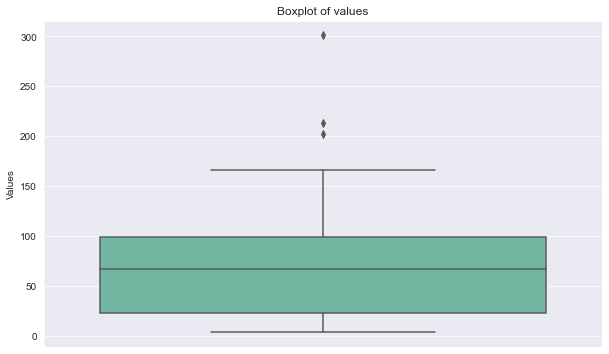

In [120]:
# (c)

plt.figure(figsize = (10,6))

sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.boxplot(y = data['value'],whis = 1)

plt.title('Boxplot of values')
plt.ylabel('Values')

plt.show()

#### Exercise 4.4.4

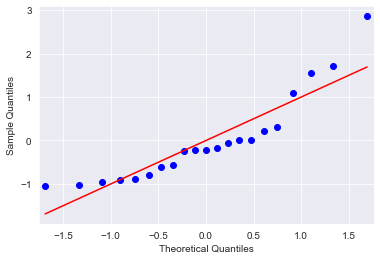

In [121]:
sm.qqplot(data['value'],line = 's',dist = scipy.stats.distributions.norm,fit = True)
py.show()

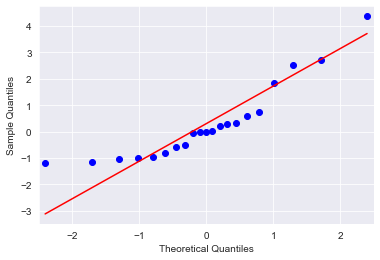

In [122]:
sm.qqplot(data['value'],line = 's',dist = scipy.stats.distributions.laplace,fit = True)
py.show()

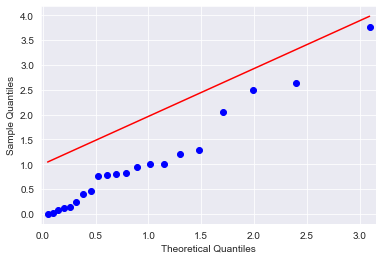

In [123]:
sm.qqplot(data['value'],line = 's',dist = scipy.stats.distributions.expon,fit = True)
py.show()

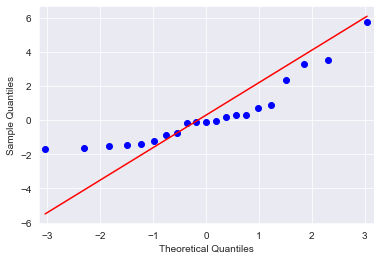

In [124]:
sm.qqplot(data['value'],line = 's',dist = scipy.stats.distributions.logistic,fit = True)
py.show()

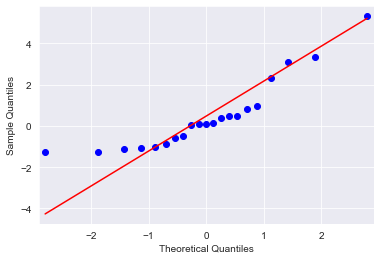

In [125]:
sm.qqplot(data['value'],line = 's',dist = scipy.stats.distributions.t,fit = True)
py.show()

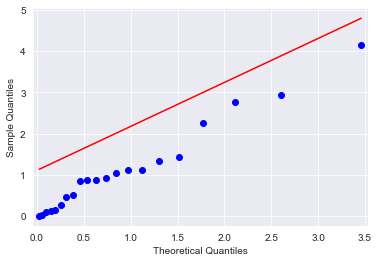

In [126]:
sm.qqplot(data['value'],line = 's',dist = scipy.stats.distributions.f,fit = True)
py.show()

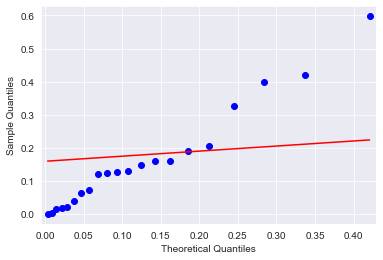

In [127]:
sm.qqplot(data['value'],line = 's',dist = scipy.stats.distributions.beta,fit = True)
py.show()

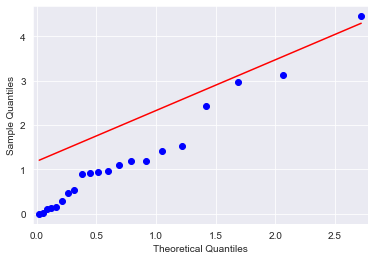

In [128]:
sm.qqplot(data['value'],line = 's',dist = scipy.stats.distributions.gamma,fit = True)
py.show()

#### Exercise 4.4.5

$P(Y_4) \geq 3 = 1 - (1 - e^{-3})^4$

In [129]:
e = np.exp(1)
py4 = 1-(1-e**(-3))**4
print(py4)

0.18476325541545102


#### Exercise 4.4.8

For some reason, no solution is given for this problem in the solutions manual!

The two variables can be expressed as $Z_1 = Y_2$ and $Z_2 = Y_4 - Y_2$ which in turn means $Y_2 = Z_1$ and $Y_4 = Z_1 + Z_2$. The jacobian is therefore $1$.

Equation (4.4.3) in the text can be used to obtain the joint pdf of $Y_2$ and $Y_4$ as
$g_{Y_2,Y_4}(y_2,y_4) = 120(1-e^{-y_2})(e^{-y_2} - e^{-y_4})e^{-y_2} e^{-2y_4}$.

Hence the joint pdf of $Z_1$ and $Z2$, namely $h_{Z_1,Z_2}(z_1,z_2)$, is given by
$h_{Z_1,Z_2}(z_1,z_2) = 120 e^{-4z_1}e^{-2z_2} (1-e^{-z_1})(1-e^{-z_2})$. We can find marginal pdfs of $Z_1$, and $Z_2$, to get
$h_{Z_1}(z_1) = \int\limits_{0}^{\infty} h_{Z_1,Z_2}(z_1,z_2) dz_2$ and $h_{Z_2}(z_2) = \int\limits_{0}^{\infty} h_{Z_1,Z_2}(z_1,z_2) dz_1$.

After integrating, we get $h_{Z_1}(z_1) = 20 e^{-4z_1}(1-e^{-z_1})$ and $h_{Z_2}(z_2) = 6e^{-2z_2}(1-e^{-z_2})$. It is easy to check that $h_{Z_1,Z_2}(z_1,z_2) = h_{Z_1}(z_1) \times h_{Z_2}(z_2)$ and hence, $Z_1$ and $Z2$ are independent.

#### Exercise 4.4.9

Use Equation (4.4.2) of the text, and substitute $F(y_k) = y_k$ and $f(y_k) = 1$, which results in Equation (3.3.9) in the text where we need to identify $x = y_k$, $\alpha = k$ and $\beta = n-k+1$ and use the appropriate values for the Gamma function on these integers using the Equation after Equation (3.3.1), namely $\Gamma(\alpha) = (\alpha - 1)!$ when $\alpha$ is an integer.

#### Exercise 4.4.14

I checked my solution with that given for a generic case (look for the expression for $f_V(v)$ in that solution) in

https://math.stackexchange.com/a/945145/145325

and it matches. This again is one of those problems that they do not provide a solution!



Just define $Z_1 = Y_1$ and $Z_2 = (Y_1+Y_3)/2$. We need the pdf of $Z_2$ which we go about mechanically as usual, starting with Equation (4.4.3) in the text, along with the variable transformation, to get $g_{Z_1,Z_2}(z_1,z_2) = 24(z_2 - z_1)$. We then need to integrate this and get the marginal pdf $g_{Z_2}(z_2) = \int\limits_{0}^{z_2} g_{Z_1,Z_2}(z_1,z_2) dz_1$ if $z_2 < 1/2$, and $g_{Z_2}(z_2) = \int\limits_{2z_2-1}^{z_2} g_{Z_1,Z_2}(z_1,z_2) dz_1$ if $1/2 < z_2 < 1$. This needs us to recognize the region of integration outlined in the beginning of the text for double integrals, as well as in the "Mathematical Primer" that is mentioned in the Preface. This gives is the pdf to be

$g_{Z_2}(z_2) = 12z_2^2$, if $z_2 < 1/2$

$g_{Z_2}(z_2) = 12(1-z_2)^2$, if $ 1/2 < z_2 < 1$

#### Exercise 4.4.16

Critical part of the solution can be found in the following Stackexchange thread

https://math.stackexchange.com/a/4174305/145325

Another one of those without a solution in the solutions manual!

#### Exercise 4.4.20

This solution is based on Dilip Sarwate's explaination on Stackexchange about the joint pdf of the minumum and maximum of two random variables, whose link is given below.

https://stats.stackexchange.com/a/50391/183497

While the question has a hypothesis that the random variables are independent, his main equation (given below) does not depend on that hypothesis.

If two random variables $X$ and $Y$ are given along with their joint pdf, then the joint pdf of $U = min(X,Y)$ and $V = max(X,Y)$, as given in the link above, is

$f_{U,V}(u,v) = f_{X,Y}(u,v) + f_{X,Y}(v,u)$ if $v > u$

$=0$, otherwise.

Plugging in the given joint pdf into the above equation, we get that $f_{U,V}(u,v) = \frac{12}{7}(u+v)^2$ if $v > u$, $ = 0$, if $u > v$. Integrating this pdf in the region $0<u<v<1$, the upper part of the diagonal of the unit square with origin at $(0,0)$, we do get that this integrates to $1$.

Unfortunately, solution is not given for this problem so I cannot really guarentee the validity of the solution :(

#### Exercise 4.4.23

Part a.

This is the Irwin-Hall distribution for the $n = 3$ case and the answer is given in

https://en.wikipedia.org/wiki/Irwin%E2%80%93Hall_distribution#Special_cases



First, we find the pdf of $X_1 + X_2$. Consider the transformation $Z_1 = X_1$ and $Z_2 = X_2 + X_1$. Then we need to find the joint pdf of $Z_1$ and $Z_2$ and integrate on $Z_1$ to get the pdf of $Z_2 = X_1 + X_2$.

In Exercise (2.2.5), the expression for the pdf of sum of two random variables is given, and we write it out for our case below.

$f_{Z_2}(z_2) = \int\limits_{-\infty}^{\infty} f_{X_1,X_2}(z_1,z_2 - z_1) dz_1$, as the jocobian of the transformation is $1$. Since $0 < x_1 = z_1 < 1$ and $0 < x_2 = z_2 - z_1 < 1$, we have $0 < z_1 < z_2 < 2$. Hence the integral is $0$ outside of these limits and we have

$f_{Z_2}(z_2) = \int\limits_{0}^{z_2} 1 dz_1 = z_2$, if $0 < z_2 < 1$, 

and

$f_{Z_2}(z_2) = \int\limits_{z_2 - 1}^{1} 1 dz_1 = 2 - z_2$, if $1 < z_2 < 2$.

Note that the region of integration on a graph of $(Z_1,Z_2)$ is the interior of a paralellogram, with vertices at $(0,0)$, $(0,1)$, $(1,2)$, and $(1,1)$. The first integral above is the region below the line $z_2 = 1$, and the second integral is for the region above that line.

Next step is to repeat the process above for the random variables $Z_2$, and $X_3$, with the transformation $Z_3 = Z_2 + X_3$ keeping the first variable as $Z_2$ to avoid introducing new names. 

A similar integral is to be evaluated and the graph of $(Z_2,Z_3)$ is the interior of a paralellogram, with vertices at $(0,0)$, $(0,1)$, $(2,3)$, and $(2,2)$. There will be three integrals to be evaluated. The first integral will be the region below the line $z_3 = 1$, and the second integral is for the region between that line and the line $Z_3 = 2$, while the final region is the region above the line $Z_3 = 2$. 

More minor details are not recorded here. It is worth mentioning that the integral in the second region (between the lines $z_3 = 1$ and $z_3 = 2$) needs to be evaluated by splitting the limits between $z_2 = z_3 - 1$ to $z_2 = 1$, and from $z_2 = 1$ to $z_2 = z_3$, as the pdf of $z_2$ is different for these two regions. It can be verified that the final answer is

$f_{Z_3}(z_3) = \int\limits_{0}^{z_3} z_2 dz_2 = \frac{z_3^2}{2}$, if $0 < z_3 < 1$,

$f_{Z_3}(z_3) = \int\limits_{z_3 - 1}^{1} z_2 dz_2 + \int\limits_{1}^{z_3} (2 - z_2) dz_2 = \frac{6z_3 - 2z_3^2 - 3}{2}$, if $1 < z_3 < 2$, 

and

$f_{Z_3}(z_3) = \int\limits_{z_3-1}^{2} (2 - z_2) dz_2 = \frac{(3-z_3)^2}{2}$, if $2 < z_3 < 3$.

Part b.

If $Y_1 < Y_2 < Y_3$ is the order statistics of $X_1$, $X_2$, and $X_3$, we need the pdf of $Y_3$ which is a routine application of Equation (4.4.2) from the text, giving us

$g_{Y_3}(y_3) = 3 [F_X(y_3)]^2 f_X(y_3) = 3y_3^2$.

#### Exercise 4.4.25

#### (a)

The joint pdf of $Y_1$ and $Y_5$ from Equation (4.4.3) of the text, is

$f_{Y_1,Y_5}(y_1,y_5) = 20[F(y_5) - F(y_1)]^4f(y_1)f(y_5)$.

Hence $P(Y_1 < \xi_{0.5} < Y_5) = \int\limits_{\xi_{0.5}}^{\infty}[\int\limits_{-\infty}^{\xi_{0.5}} f_{Y_1,Y_5}(y_1,y_5) dy_1 ] dy_5 = \int\limits_{0.5}^{1}[\int\limits_{0}^{0.5} 20[F(y_5) - F(y_1)]^4 dF(y_1) dF(y_5) = \frac{15}{16}$

In [130]:
f = 1
a = (5*f**2 + 2*f**4 - 17/3 *f**3 -f)*15/8
f = 1/4
b = (5*f**2 + 2*f**4 - 17/3 *f**3 -f)*15/8
print((a-b))

0.6591796874999994


In [131]:
(a-b)*1024

674.9999999999994

#### (b)

Very similar to part (a).

The joint pdf of $Y_1$ and $Y_3$ from Equation (4.4.3) of the text, is

$f_{Y_1,Y_3}(y_1,y_3) = 60[F(y_3) - F(y_1)][1-F(y_3)]^2f(y_1)f(y_3)$.

Hence $P(Y_1 < \xi_{0.25} < Y_3) = \int\limits_{\xi_{0.25}}^{\infty}[\int\limits_{-\infty}^{\xi_{0.25}} f_{Y_1,Y_3}(y_1,y_3) dy_1 ] dy_3 = \int\limits_{0.25}^{1}[\int\limits_{0}^{0.25} 60[F(y_3) - F(y_1)][1-F(y_3)]^2 dF(y_1) dF(y_3) = \frac{675}{1024}$

In [132]:
4**4

256

In [133]:
5**4

625

#### (c)

The joint pdf of $Y_4$ and $Y_5$ from Equation (4.4.3) of the text, is

$f_{Y_4,Y_5}(y_4,y_5) = 20[F(y_4)]^4f(y_4)f(y_5)$.

Hence $P(Y_4 < \xi_{0.80} < Y_5) = \int\limits_{\xi_{0.80}}^{\infty}[\int\limits_{-\infty}^{\xi_{0.80}} f_{Y_4,Y_5}(y_4,y_5) dy_4 ] dy_5 = \int\limits_{0.80}^{1}[\int\limits_{0}^{0.80} 20[F(y_4)]^4f(y_4)f(y_5) dF(y_4) dF(y_5) = \frac{256}{625} = (0.8)^4$

#### Exercise 4.4.26

In [134]:
math.factorial(9)/24

15120.0

The joint pdf of $Y_3$ and $Y_7$ from Equation (4.4.3) of the text, is

$f_{Y_3,Y_7}(y_3,y_7) = 15120[F(y_3)]^2[1 - F(y_7)]^2[F(y_7) - F(y_3)]^3f(y_3)f(y_7)$.

$P(Y_3 < \xi_{0.50} < Y_7) = \int\limits_{\xi_{0.50}}^{\infty}[\int\limits_{-\infty}^{\xi_{0.50}} f_{Y_3,Y_7}(y_3,y_7) dy_3 ] dy_7 = \int\limits_{0.50}^{1}[\int\limits_{0}^{0.50} 15120[F(y_3)]^2[1 - F(y_7)]^2[F(y_7) - F(y_3)]^3 dF(y_3) dF(y_7)$.

The above integral is nasty but thanks to Numpy and Pandas, we can do it numerically, as done below. We get a final answer as $0.82$ which is close to the answer given at the end of the text, which is $0.824$.

In [135]:
p1 = np.poly1d([-1,1])
p3 = p1*p1*p1
p4 = p3*np.poly1d([1,0,0])
print(p4)

    5     4     3     2
-1 x + 3 x - 3 x + 1 x


In [136]:
60*(np.polyint(p4))

poly1d([-10.,  36., -45.,  20.,   0.,   0.,   0.])

In [137]:
p5 = 15120 * 1/8 * np.poly1d([1/3,-3/8,3/20,-1/48]) * p1 * p1
print(p5)

     5        4        3        2
630 x - 1969 x + 2331 x - 1315 x + 362.2 x - 39.38


In [138]:
p6 = np.polyint(p5)
(p6(1) - p6(0.5))

0.8203125

#### Exercise 4.4.28

#### (a)



The joint pdf of $Y_1$ and $Y_2$ from Equation (4.4.3) of the text, is

$$f_{Y_1,Y_2}(y_1,y_2) = 2f(y_1)f(y_2)$$, 

where $-\infty < y1 < y2 < \infty$, that is the pdf is non-zero for the region above the line $Y_1 = Y_2$ on a graph of $Y_2$ vs $Y_1$.

Here, $f(x)$ is the pdf of $N(\mu,\sigma^2)$. Let $F(x)$ stand for the cdf of $N(\mu,\sigma^2)$.

$P(Y_1 < \mu < Y_2) = \int\limits_{\mu}^{\infty}[\int\limits_{-\infty}^{\mu} f_{Y_1,Y_2}(y_1,y_2) dy_1 ] dy_2 = \int\limits_{0.50}^{1}[\int\limits_{0}^{0.50} 2 dF(y_1) dF(y_2) = \cfrac{1}{2}$.

$E(Y_2 - Y_1) = \int\limits_{-\infty}^{\infty}[\int\limits_{-\infty}^{y_2} (y_2 - y_1) f_{Y_1,Y_2}(y_1,y_2) dy_1 ] dy_2$. This integral can be evaluated seperately, by finding $E(Y_2)$, and $E(Y_1)$ seperately. This was done in Exercise (4.4.15) when the mean was zero. However, writing $E(Y_2 - Y_1) = E(Y_2 - \mu) - E(Y_1 - \mu)$, and substituting $Y_2' = Y_2 - \mu$ and $Y_1' = Y_1 - \mu$, we can deduce (with algebra similar to that in Exercise (4.4.15)) that $E(Y_2) = \sigma/\sqrt{\pi}$, and $E(Y_1) = - \sigma/\sqrt{\pi}$, and hence, $$E(Y_2 - Y_1) = 2 \sigma/\sqrt{\pi}$$.

#### (b)

$\overline{X} - c \sigma < \mu < \overline{X} + c \sigma \iff -c\sqrt{2} < \cfrac{\overline{X} - \mu}{\sigma / \sqrt{2}} < c\sqrt{2}$

So $P\left(\overline{X} - c \sigma < \mu < \overline{X} + c \sigma\right) = 1/2 \implies P\left(-c\sqrt{2} < \cfrac{\overline{X} - \mu}{\sigma / \sqrt{2}} < c\sqrt{2}\right) = 1/2 \implies P\left( \cfrac{\overline{X} - \mu}{\sigma / \sqrt{2}} < c\sqrt{2} \right) = 3/4$, giving us $c = 0.4769$ and the length of the interval as $0.9539 \sigma$.

The answer given at the back of the book is $0.92 \sigma$ because he states in the solution manual that the $50$% confidence interval is $\overline{X} \pm \cfrac{0.65 \sigma}{\sqrt{2}}$. It is actually $\overline{X} \pm \cfrac{0.674 5\sigma}{\sqrt{2}}$. This can be verified in through the online confidence interval calculator for a sample mean of length $2$.

https://www.calculator.net/confidence-interval-calculator.html?size=2&mean=0&sd=1.4142136&cl=50&x=31&y=25

In [139]:
c = invert_norm(3/4)/np.sqrt(2)
print(np.round(c,4))
print('Length of this interval is', np.round(2*c,4), 'while that in part (a) was', np.round(2/np.sqrt(np.pi),4))

0.477
Length of this interval is 0.9539 while that in part (a) was 1.1284


#### Exercise 4.4.29

Well there are six possibilities. By checking each case by feeding it to the algorithm, and categorizing them as successful or failed, it is straightforward to see that the given algorithm results in $y_3$ in exactly three cases out of six and hence, the probability ends up being $1/2$.

#### Exercise 4.4.30

Basically, it is an application of Equation (4.4.8) of the text, where we need to find $i$ and $j$ such that $i$ is approximately lower than $n/2$ by as much as $j$ is higher than $n/2$, and $P\left( Y_i < \xi_{0.5} < Y_j\right)$ is as close to $90$% as possible.

Below, I found approximate values of $i$ and $j$ by inverting binomial cdf for a $90$% confidence interval and them a bit tweaked it to get a the confidence number closer to $90$%.

In [140]:
lt = pd.read_csv('data/lifetimemotor.csv')
lt.drop(['Unnamed: 0'],axis = 1,inplace = True)
n=len(lt)

In [141]:
def invert_binomk(t,p,n):
    k = 0
    sign = -1
    temp = dxb(p,t,k,n)
    while(sign < 0):
        if(dxb(p,t,k+1,n) < 0):
            k = k + 1
        else:
            sign = 1
    return k

In [142]:
l = invert_binomk(0.05,0.5,20) + 2
h = invert_binomk(0.95,0.5,20) + 1
lt.index = [i+1 for i in lt.index]
lt['lifetime'].loc[h]

124

In [143]:
lt['lifetime'].loc[l]

40

In [144]:
binom.cdf(h,n,p)-binom.cdf(l,n,0.5)

0.8684072366143356

In [145]:
lt.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
            20],
           dtype='int64')

#### Exercise 4.4.31

#### (a)

Just use Equation (4.4.2) from the text to get the pdf of $Y_n$ and find the required probability by integrating between the pdf $c\theta$ and $\theta$.

#### (b)

In [146]:
c = 0.05**(1/3*4)
y4 = 2.3
print('Confidence interval is',(np.round(y4,2),np.round(y4/c,2)))

Confidence interval is (2.3, 124.86)


#### Exercise 4.4.32

In [147]:
data = pd.read_csv('data/bb.csv')
wt = pd.DataFrame(data[['weight','hitpitind']].copy())
wt.head()

,weight,hitpitind
0,218,0
1,185,1
2,219,0
3,185,1
4,160,1


In [148]:
pitch = wt[['weight']].loc[wt['hitpitind'] == 0].copy()
hit = wt[['weight']].loc[wt['hitpitind'] == 1].copy()

pitch.reset_index(drop=True, inplace=True)
hit.reset_index(drop=True, inplace=True)
print(pitch.head(2))
print(hit.head(2))

   weight
0     218
1     219
   weight
0     185
1     185


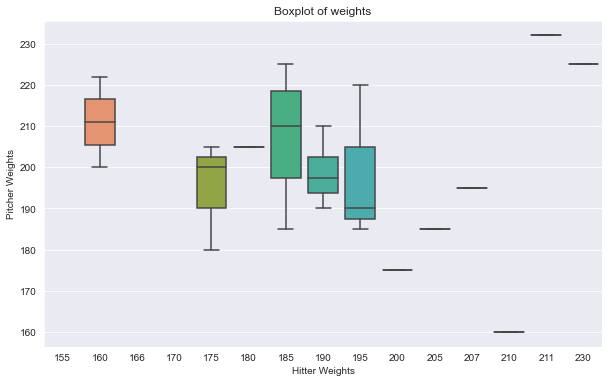

In [149]:
plt.figure(figsize = (10,6))

sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.boxplot(x = hit['weight'], y = pitch['weight'])

plt.title('Boxplot of weights')
plt.ylabel('Pitcher Weights')
plt.xlabel('Hitter Weights')

plt.show()

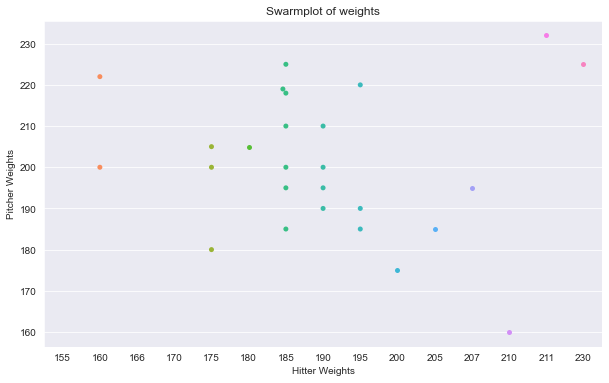

In [150]:
plt.figure(figsize = (10,6))

# sns.set_style('darkgrid')
# sns.set_palette('Set2')

sns.swarmplot(x = hit['weight'], y = pitch['weight'])

plt.title('Swarmplot of weights')
plt.ylabel('Pitcher Weights')
plt.xlabel('Hitter Weights')

plt.show()

In [151]:
sms.DescrStatsW(hit['weight']).tconfint_mean()

(179.30186040083407, 191.5466244476508)

In [152]:
sms.DescrStatsW(pitch['weight']).tconfint_mean()

(193.93817803611802, 208.06182196388198)

#### Exercise 4.5.2

In [153]:
data = pd.read_csv('data/darwin.csv')
data.drop(['Unnamed: 0'],axis = 1,inplace = True)
data['delta'] = data['cross'] - data['self']
n = len(data)
data.tail()

,cross,self,delta
10,23.250,16.25,7.000
11,21.000,18.00,3.000
12,22.125,12.75,9.375
13,23.000,15.50,7.500
14,12.000,18.00,-6.000


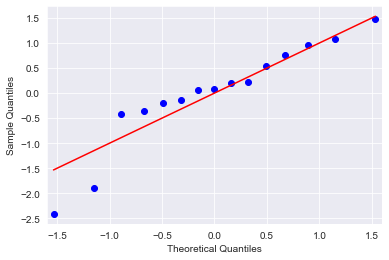

In [154]:
sm.qqplot(data['delta'],line = 's',dist = scipy.stats.distributions.norm,fit = True)
py.show()

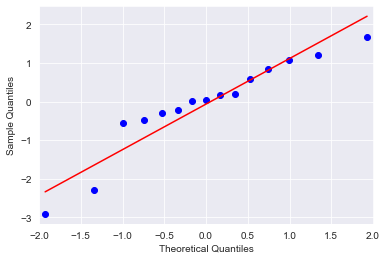

In [155]:
sm.qqplot(data['delta'],line = 's',dist = scipy.stats.distributions.t,fit = True)
py.show()

In [156]:
t = invert_studt(0.95,n-1)
xb = np.mean(data['delta'])
samp_std = data['delta'].std()/np.sqrt(n)
mu0 = xb - samp_std*t
print(mu0)

0.47427011212759007


In [157]:
t_value,p_value=stats.ttest_1samp(data['delta'],0,alternative = 'greater')

In [158]:
print('The t-statistic of the difference in heights is',np.round(t_value,4))

The t-statistic of the difference in heights is 2.1506


Alternatively, we can find the so-called "T-Statistic" by obtaining $\cfrac{\overline{X}}{S/\sqrt{n}}$. As in Example (4.5.5), we have assumed that $\mu_0 = 0$.

In [159]:
t_value_alt = xb/samp_std
print('The t-statistic of the difference in heights, using our alternative method, results in the same value namely',np.round(t_value_alt,4))

The t-statistic of the difference in heights, using our alternative method, results in the same value namely 2.1506


#### Exercise 4.5.3

Solution is a trivial double integral over the critical region and is given in the solutions manual, but I found it a bit difficult to understand why the power function was even defined. The material in the following webpage explains the reason well.

https://online.stat.psu.edu/stat415/lesson/25/25.2

#### Exercise 4.5.4

Significance level $\alpha$, which he originally called as "Size of the Test", which is the pdf of the test under the null hypothesis, which in this case means $H_0: p = p_0 (= 1/2)$, is given by

In [160]:
binom.cdf(3,10,0.5) 

0.17187499999999994

Power of the test is $1 - \beta$, is simply the pdf of the test under the alternative hypothesis, which in this case means $H_1: p = p_1 (= 1/4)$.

In [161]:
binom.cdf(3,10,0.25) 

0.7758750915527344

#### Exercise 4.5.5

Well the critical region equation simply boils down to the condition $x_1 + x_2 \leq 2\log{2}$. The power is then then given by the probability of the variables lying in this critical region for $\theta \in \omega_1$ which in our case corresponds to $\theta = 1$, while the significance level is the same probability for $\theta \in \omega_0$ which in our case corresponds to $\theta = 2$.

The probability of samples belonging to the critical region (say $x_1 + x_2 < y$) is given by the double integral
$$\int\limits_{0}^{y}\left\{\int\limits_{0}^{y-x_2} f_{X_1,X_2}(x_1,x_2) dx_1 \right\} dx_2$$
$$= \int\limits_{0}^{y}\left\{\int\limits_{0}^{y-x_2} \cfrac{e^{- \left( \frac{x_1+x_2}{\theta}\right)}}{\theta^2} dx_1 \right\} dx_2$$
$$=\cfrac{1-e^{-\frac{y}{\theta}}}{\theta} - \cfrac{ye^{-\frac{y}{\theta}}}{\theta^2}$$.
With this, we get $\alpha = 1/2 - \log{(2)}/2$, and the power of the test $\gamma_C = 3/4 - \log{(2)}/2$.

I verified my solution with a solution given elsehwere. They used the simple fact that two gamma distributed variables, when added, gives another gamma variable which is a cool way of solving it. To each his own I guess!

Disclaimer -- I found the text below in a document titled "Math 362" (link given below). 

https://cs.du.edu/~paulhorn/362/362assn3-solns.pdf

The text below was not written by me.

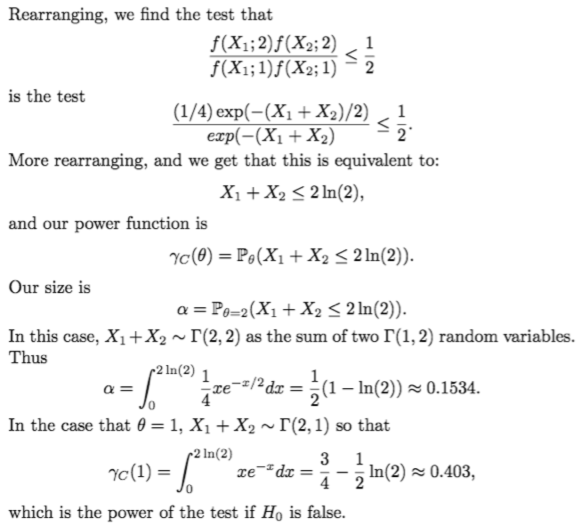

#### Exercise 4.5.6

In [162]:
k = 10
n = 20
prob = [i/100 for i in range(20,80)]
gm = []
for p in prob:
    gm.append(binom.cdf(k,n,p))

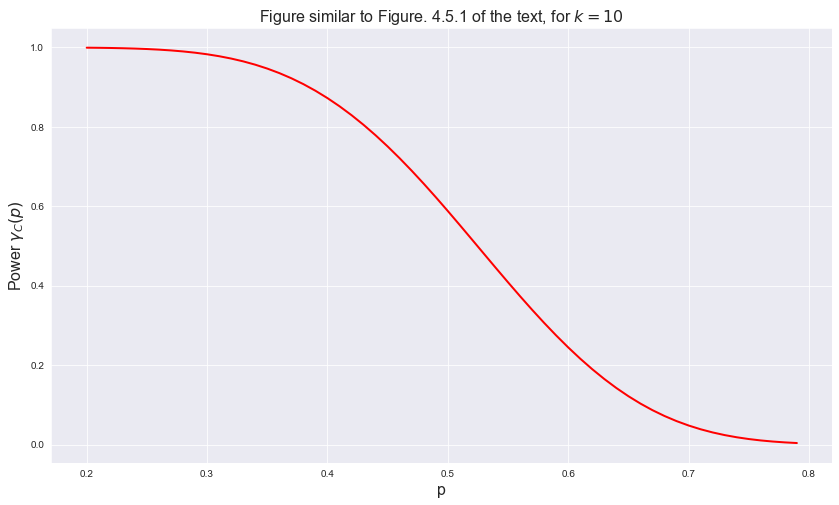

In [163]:
plt.figure(figsize = (14,8))
plt.plot(prob,gm,linewidth = 2,color = 'red')
plt.xlabel('p',fontsize = 16)
plt.ylabel('Power $\gamma_C(p)$',fontsize = 16)
plt.title('Figure similar to Figure. 4.5.1 of the text, for $k=10$',fontsize = 16)
plt.show()

In [164]:
# Just a direct application of the formula given on page #270 (equation is not numbered)
p0 = 0.7
a = binom.cdf(k,n,p0)
print('Level of significance is',np.round(a,4))

Level of significance is 0.048


#### Exercise 4.5.8

In [165]:
t1 = 1 - 0.01
t2 = 1 - 0.98

z1 = invert_norm(t1)
z2 = invert_norm(t2)
print(z1,z2)

2.32666015625 -2.0538330078125


In [166]:
n = 5000**2 * ((z1-z2)/(35000 - 30000))**2
c = 30000+ z1*5000/np.sqrt(np.round(n,0))

In [167]:
print('Values of n and c are',np.round(n,0),'and',np.round(c,2),'respectively')

Values of n and c are 19.0 and 32668.86 respectively


#### Exercise 4.5.9

Basically the sum of i.i.d random variables whose distribution is Poisson, also has a Poisson distribution. The R-Code that he gives just plots the cdf of a Poisson distributed random variable as a function of $\theta$. Note that the sum of these $12$ random variable has a Poisson distribution with parameter $12\theta$.

In [168]:
t = [i/100 for i in range(10,51)]
y = []
for lmda in t:
    y.append(poisson.cdf(k=2, mu=12*lmda))

Significance level is the value of the cdf for the null case $H_0$, i.e. when $\theta = 1/2$

In [169]:
print('Significance level is',np.round(y[-1],4))

Significance level is 0.062


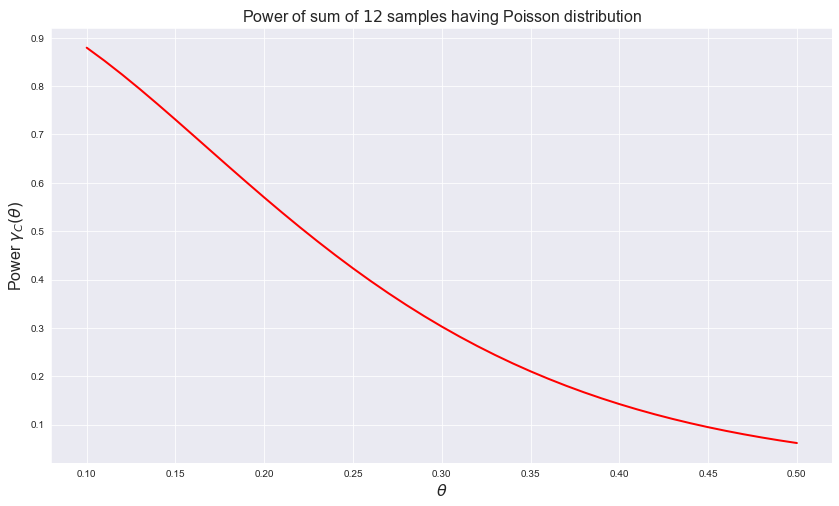

In [170]:
plt.figure(figsize = (14,8))
plt.plot(t,y,linewidth = 2,color = 'red')
plt.xlabel('$\\theta$',fontsize = 16)
plt.ylabel('Power $\gamma_C(\\theta)$',fontsize = 16)
plt.title('Power of sum of $12$ samples having Poisson distribution',fontsize = 16)
plt.show()

I got the following graph by plotting the same in R using his code

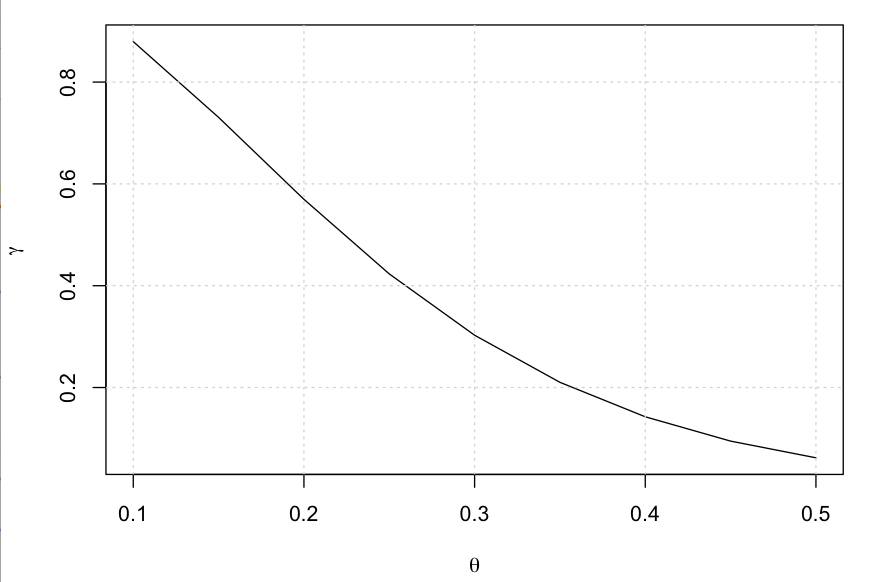

#### Exercise 4.5.10

In [171]:
# His answers based on the Normality assumption
n= 73
c = 42
print(1-binom.cdf(c-1,n,0.5))
print(1-binom.cdf(c-1,n,2/3))

0.12082236157037585
0.960406624244004


In [172]:
lmp = []
nn = []
for n in range(10,100):
    c = 1+invert_binomk(0.9,0.5,n)
    lmp.append(1-binom.cdf(c-1,n,2/3))
    nn.append(n)

In [173]:
delta = [lmp[i]-0.95 for i in range(len(lmp))]
delta = np.absolute(delta)
delta = list(delta)
min_index = delta.index(np.min(delta))

In [174]:
n = nn[min_index]

In [175]:
c = 1+invert_binomk(0.9,0.5,n)
print(n,c)

69 40


In [176]:
print(1-binom.cdf(c-1,n,0.5))
print(1-binom.cdf(c-1,n,2/3))

0.11420011267664842
0.9494876535142719


The iteration that I have used gives values closer to the desired values.

#### Exercise 4.5.11

In the same document that I mentioned in the solution to Exercise 4.5.5 above, the solution to this problem is given and it confirmed that my solution is correct.

#### (a)

The pdf of $Y_4$ is $f_{Y_4}(y_4) = \frac{4y_4^3}{\theta^4}$. We need to find $c$ such that $P(Y_4 \geq c) = 0.05$. That would mean that $\frac{c^4}{\theta^4}$ for $\theta = 1$ is equal to $1-0.05 = 0.95$ which results in the following.

In [177]:
c = np.sqrt(np.sqrt(0.95))
print(c)

0.9872585449014338


#### (b)

The power function of the test is basically $P(Y_4 \geq c)$ for a given value of $\theta$ which is given by $P_{\theta}(Y_4 \geq c) = 1 - \frac{c^4}{\theta^4} = 1 - \frac{0.95}{\theta^4}$.

#### Exercise 4.5.12

#### (a)

The significance level is the probability under null hypothesis, of the critical region which is $\Sigma_{i = 1}^{8}x_i \geq 8$. The sum of i.i.d random variables having Poisson distribution is itself a Poisson random variable with eight times the parameter. The desired probability for $X = \Sigma_{i = 1}^{8}X_i$ is $P_{8\mu}(X \geq 8) = 1- P_{8\mu}(X \leq 7)$ whose expression in R is $1-ppois(7,8*0.5)$.

In [178]:
print(1 - poisson.cdf(k=7, mu=8*0.5))

0.05113361579284725


#### (b)

In [179]:
a = 1 - poisson.cdf(k=7, mu=8*0.75)
b = 1 - poisson.cdf(k=7, mu=8)
c = 1 - poisson.cdf(k=7, mu=8*1.25)
print(a,b,c)

0.25602023954628295 0.5470391905130054 0.779779353398301


#### (c)

In [180]:
t = [i/100 for i in range(10,151)]
y = []
for lmda in t:
    y.append(1-poisson.cdf(k=7, mu=8*lmda))

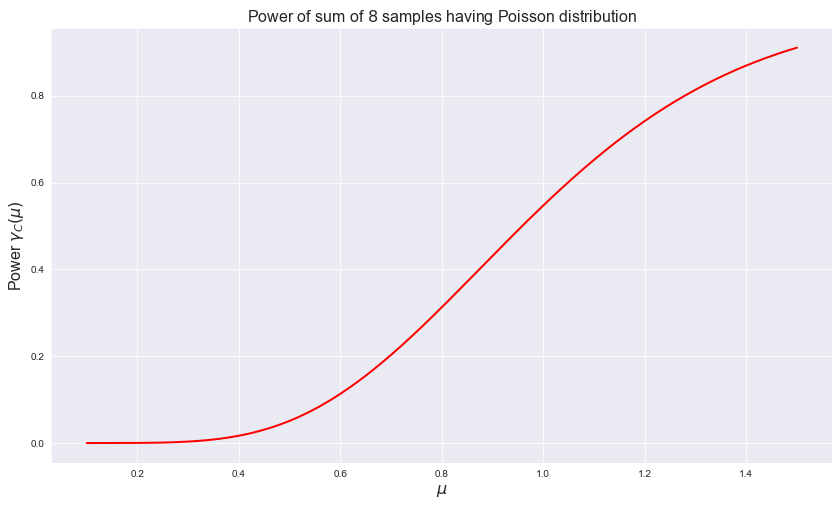

In [181]:
plt.figure(figsize = (14,8))
plt.plot(t,y,linewidth = 2,color = 'red')
plt.xlabel('$\mu$',fontsize = 16)
plt.ylabel('Power $\gamma_C(\mu)$',fontsize = 16)
plt.title('Power of sum of $8$ samples having Poisson distribution',fontsize = 16)
plt.show()

#### Exercise 4.5.13
#### (a)

In [182]:
k = 13
n = 25
p = 0.4
a = 1 - binom.cdf(k-1,n,p)
print(a)

0.15376776897576305


#### (b)

In [183]:
b = binom.cdf(k-1,n,0.6)
print(b)

0.153767768975763


#### Exercise 4.5.14

(1)

In [184]:
1-binom.cdf(15,40,0.3)

0.11514665058138851

(2)

In [185]:
1-binom.cdf(16,40,0.3)

0.06331287547840558

In [186]:
t = [i/100 for i in range(10,51)]
y16 = []
y17 = []
for p in t:
    y16.append(1-binom.cdf(15,40,p))
    y17.append(1-binom.cdf(16,40,p))

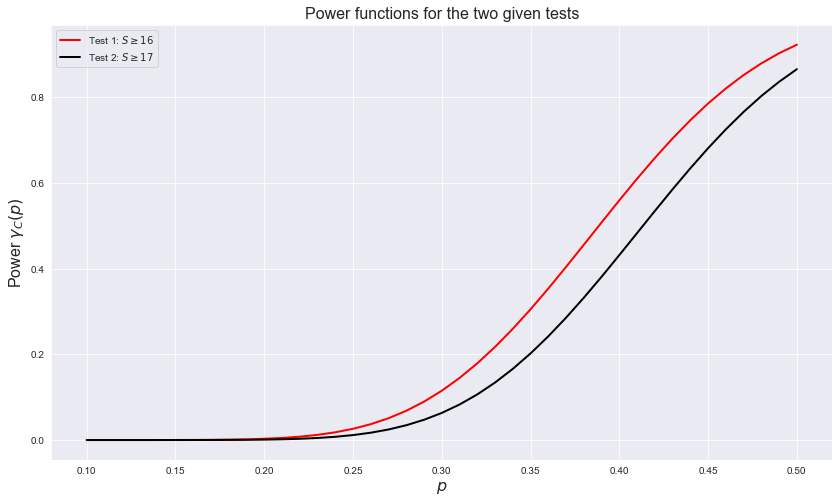

In [187]:
plt.figure(figsize = (14,8))
plt.plot(t,y16,linewidth = 2,color = 'red')
plt.plot(t,y17,linewidth = 2,color = 'black')
plt.xlabel('$p$',fontsize = 16)
plt.ylabel('Power $\gamma_C(p)$',fontsize = 16)
plt.legend(['Test 1: $S \geq 16$','Test 2: $S \geq 17$'])
plt.title('Power functions for the two given tests',fontsize = 16)
plt.show()

#### Exercise 4.6.1

In [188]:
# Naming the function zbinom1 corresponding to Z1 of Example 4.6.3 of the text.
def zbinom1(n,p0,a,ph):
    sig = np.sqrt(p0*(1-p0)/n)
    c = invert_norm(1-a/2)
    power = []
    for p in ph:
        l = (p0-p)/sig-c
        h = (p0-p)/sig+c
        prob = norm.cdf(l, loc=0, scale=1)+1-norm.cdf(h, loc=0, scale=1)
        power.append(prob)
        del prob
    return power

In [189]:
p = [i/100 for i in range(101)]
power = zbinom1(50,0.6,0.05,p)

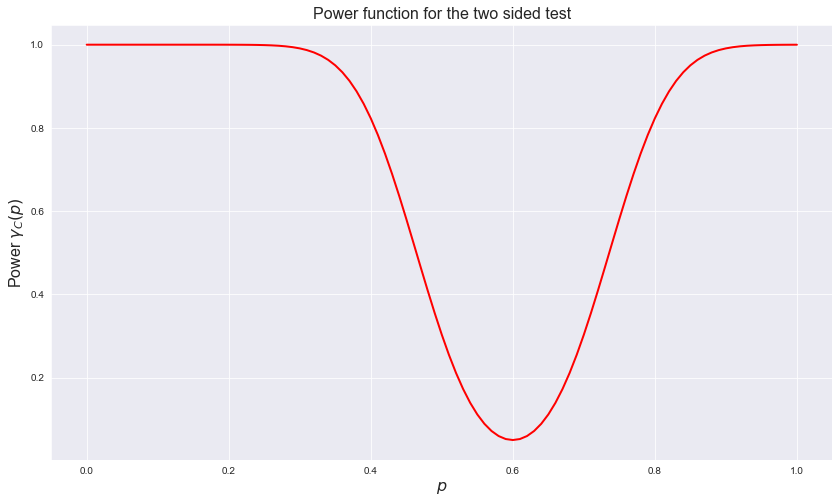

In [190]:
plt.figure(figsize = (14,8))
plt.plot(p,power,linewidth = 2,color = 'red')
plt.xlabel('$p$',fontsize = 16)
plt.ylabel('Power $\gamma_C(p)$',fontsize = 16)
plt.title('Power function for the two sided test',fontsize = 16)
plt.show()

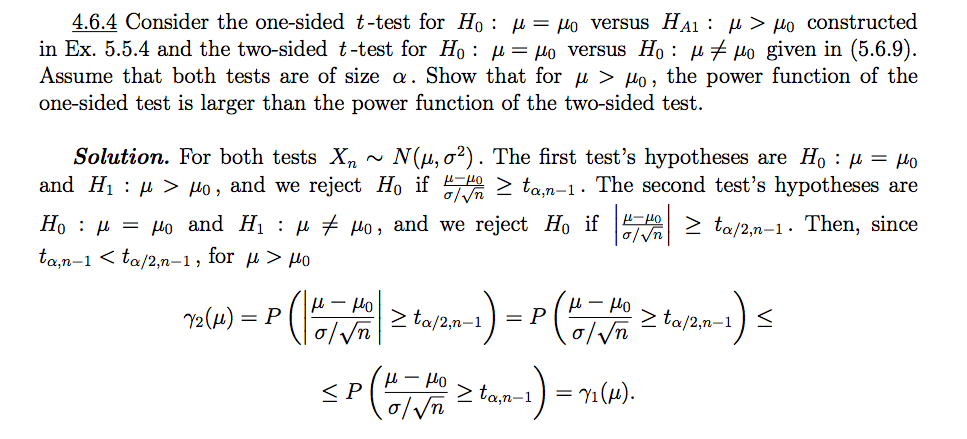

#### Exercise 4.6.5
Usefule material can be found in the following link

https://web.mit.edu/14.380/www/readings/reading3.pdf

particularly the table shown below which is relevant to this question

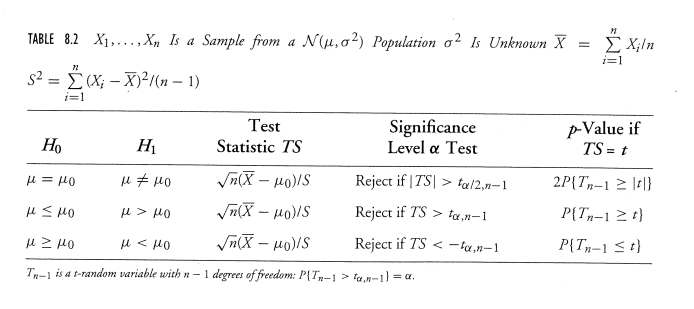

There are a bazillion useful websites with useful information on how confidence intervals relate with hypothesis testing, like the following

https://analystprep.com/study-notes/frm/part-1/quantitative-analysis/hypothesis-testing-and-confidence-intervals/

#### (a)

In [191]:
data = pd.read_csv('data/selfrival.csv')
data.drop(['Unnamed: 0'],axis = 1,inplace = True)
n=len(data)
data.head()

,self,rival
0,16.20,15.95
1,16.78,16.15
2,17.38,17.05
3,17.59,16.99
4,17.37,17.34


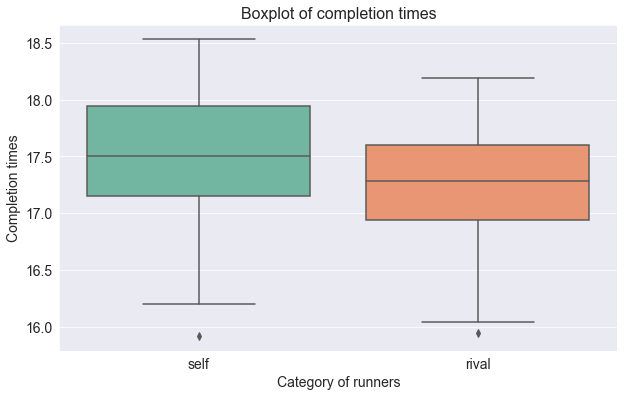

In [192]:
plt.figure(figsize = (10,6))

sns.set_style('darkgrid')
sns.set_palette('Set2')

ax = sns.boxplot(x="variable", y="value", data=pd.melt(data))

plt.title('Boxplot of completion times',fontsize = 16)
plt.ylabel('Completion times',fontsize = 14)
plt.xlabel('Category of runners',fontsize = 14)

ax.set_yticklabels(ax.get_yticks(), size = 14)
ax.set_xticklabels(['self','rival'], size = 14)

plt.show()

#### (b)

In [193]:
data['delta'] = data['rival'] - data['self']

In [194]:
t_statistic,p_value = scipy.stats.ttest_1samp(data['delta'],popmean = 0,alternative = 'less')

In [195]:
print(t_statistic,p_value)

-3.0441520690544213 0.0033375511656032783


#### (c) and (d)

In [209]:
mud = np.mean(data['delta'])
print('Point estimate of mud is',np.mean(data['delta']))

Point estimate of mud is -0.20450000000000026


In [210]:
t = invert_studt(0.95,n-1)
tst = data['delta'].mean()/data['delta'].std()*np.sqrt(n)
print(tst)

-3.0441520690544213


In [211]:
tl = mud+t*data['delta'].std()/np.sqrt(n)
print(tl)

-0.08834080223795504


Confidence interval is $(-\infty,-0.08834)$. Since the it does not contain $\mu_d = 0$, we reject the hypothesis. Hence the 'rivals' are faster!